<a href="https://colab.research.google.com/github/slfull/CNN-Assignment-2025/blob/main/ACS111114_CNN_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# CNN Classroom Exercise: Image Classification with CIFAR-10
# Objective: Practice building, training, and evaluating a CNN using TensorFlow/Keras
# Environment: Google Colab with GPU
# Dataset: CIFAR-10 (10 classes of 32x32 color images)

# Step 1: Import Libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.optimizers import Adam


In [12]:
# Step 2: Load and Preprocess CIFAR-10 Dataset
# CIFAR-10 contains 60,000 32x32 color images in 10 classes (e.g., airplane, cat, dog)
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to range [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define class names for visualization
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

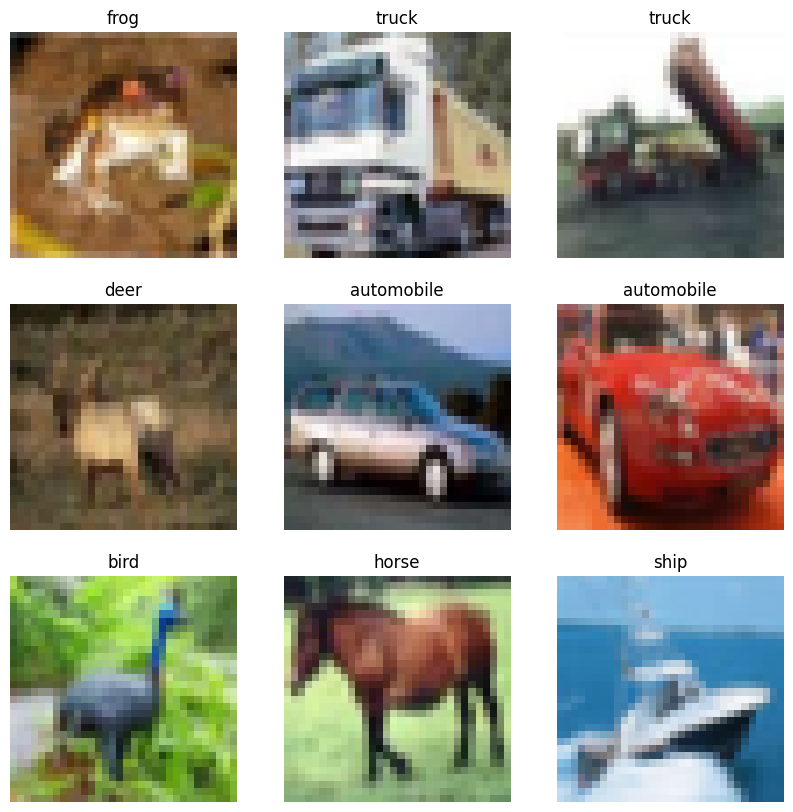

In [13]:
# Step 3: Visualize Sample Data
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(train_images[i])
    plt.title(class_names[train_labels[i][0]])
    plt.axis('off')
plt.show()

In [14]:
# Step 4: Build the CNN Model
model = models.Sequential([
    # Convolutional Layer 1: 32 filters, 3x3 kernel, ReLU activation
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    # Convolutional Layer 2: 64 filters, 3x3 kernel
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    # Convolutional Layer 3: 128 filters, 3x3 kernel
    layers.Conv2D(128, (3, 3), activation='relu'),
    # Flatten the output for dense layers
    layers.Flatten(),
    # Dense Layer: 128 units
    layers.Dense(128, activation='relu'),
    # Output Layer: 10 units (one per class) with softmax
    layers.Dense(10, activation='softmax')
])
# Display model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 357,194 (1.36 MB)

 Trainable params: 357,002 (1.36 MB)

 Non-trainable params: 192 (768.00 B)

In [15]:
# Step 4-2: Add ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
imggen = ImageDataGenerator(
    rotation_range = 15,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = True
)
imggen.fit(train_images)
train_generator = imggen.flow(train_images, train_labels, batch_size=64)

In [16]:
# Step 5: Compile the Model
model.compile(optimizer=Adam(learning_rate=0.0005) ,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
# Step 6: Train the Model
history = model.fit(train_generator, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 135s 169ms/step - accuracy: 0.4137 - loss: 1.6329 - val_accuracy: 0.5669 - val_loss: 1.2571
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 132s 168ms/step - accuracy: 0.5883 - loss: 1.1630 - val_accuracy: 0.6014 - val_loss: 1.1743
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 133s 169ms/step - accuracy: 0.6407 - loss: 1.0137 - val_accuracy: 0.6531 - val_loss: 1.0073
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 133s 170ms/step - accuracy: 0.6739 - loss: 0.9250 - val_accuracy: 0.6670 - val_loss: 0.9716
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 138s 177ms/step - accuracy: 0.6951 - loss: 0.8739 - val_accuracy: 0.6976 - val_loss: 0.8795
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 135s 172ms/step - accuracy: 0.7130 - loss: 0.8153 - val_accuracy: 0.7066 - val_loss: 0.8855
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 132s 168ms/step - accuracy: 0.7258 - loss: 0.7824 - val_accuracy: 0.6729 - val_loss: 1.0003
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 136s 173ms/step - accuracy: 0.7425 -

In [18]:
# Step 7: Evaluate the Model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")

313/313 - 6s - 19ms/step - accuracy: 0.7442 - loss: 0.7576

Test accuracy: 0.7442


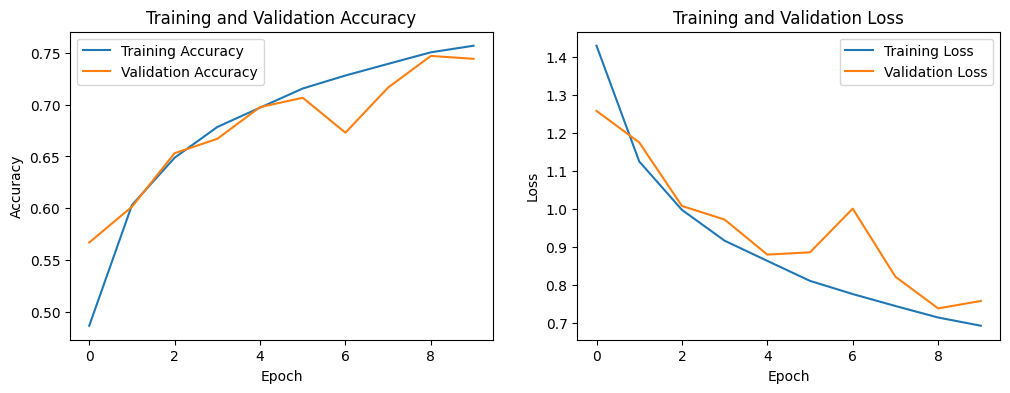

In [19]:
# Step 8: Plot Training and Validation Accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [20]:
# Step 9: Make Predictions
predictions = model.predict(test_images[:5])
for i in range(5):
    predicted_label = class_names[np.argmax(predictions[i])]
    true_label = class_names[test_labels[i][0]]
    print(f"Image {i+1}: Predicted: {predicted_label}, True: {true_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
Image 1: Predicted: cat, True: cat
Image 2: Predicted: automobile, True: ship
Image 3: Predicted: automobile, True: ship
Image 4: Predicted: airplane, True: airplane
Image 5: Predicted: frog, True: frog


In [22]:
# Step 10: Save Model Performance for Autograding
# This cell saves the model performance to a text file for GitHub Actions
try:
    # Get final training accuracy
    final_train_acc = history.history['accuracy'][-1]
    final_val_acc = history.history['val_accuracy'][-1]
    final_train_loss = history.history['loss'][-1]
    final_val_loss = history.history['val_loss'][-1]

    # Create performance summary
    performance_text = f"""Model Performance Summary:
Test Accuracy: {test_acc:.4f}
Test Loss: {test_loss:.4f}
Final Training Accuracy: {final_train_acc:.4f}
Final Validation Accuracy: {final_val_acc:.4f}
Final Training Loss: {final_train_loss:.4f}
Final Validation Loss: {final_val_loss:.4f}
Training Epochs: {len(history.history['accuracy'])}
Model Parameters: {model.count_params()}"""

    # Save to file for GitHub Actions
    with open('model_accuracy.txt', 'w') as f:
        f.write(performance_text)

    print("Model performance saved to model_accuracy.txt")
    print(performance_text)

except Exception as e:
    print(f"Error saving model performance: {e}")
    # Create a basic file even if there's an error
    with open('model_accuracy.txt', 'w') as f:
        f.write(f"Model execution completed with errors: {e}")

Model performance saved to model_accuracy.txt
Model Performance Summary:
Test Accuracy: 0.7442
Test Loss: 0.7576
Final Training Accuracy: 0.7568
Final Validation Accuracy: 0.7442
Final Training Loss: 0.6925
Final Validation Loss: 0.7576
Training Epochs: 10
Model Parameters: 357194


# Task 5:

## 實驗過程:
使用CNN進行圖像分類，且修改範例程式碼，針對部分參數，例如learning rate進行調整，並加入BatchNormalization提升模型的穩定性
## 結果分析:
視覺化圖片有點抖，可能是因為訓練次數不夠多造成
## 改進建議:
可以增加訓練次數